# Exploring Hacker News Posts 

Time is a crucial factor in any analysis. From the analysis of time, we can obtain clearer insights into underlying trends and systemic patterns. For example, Information from time analysis could help a social media user in selecting the best time post content that maximally engages the community.

In this project, we will work with a dataset of submissions to a popular technology site called Hacker News. We will try to identify the 'golden hours' for users looking to create posts on the platform, then we will explore the type of posts that draw user engagement.


<img src="https://camo.githubusercontent.com/db16763eecf4b61bcd5cf7e602059b4170eafd7590359ea3ccd7fb6a99f5cb53/68747470733a2f2f766f6c756d656e742e636f6d2f626c6f672f696d672f686e2d646972742d6269672e706e67" alt="Kitten" title="Hacker news" 
     width='100%' />


## Overview

[Hacker News](https://news.ycombinator.com/) is a site started by the startup incubator, [Y Combinator](https://www.ycombinator.com/), where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. The platform is extremely popular in technology and startup circles, and posts that make it to the top listing can get hundreds of thousands of visitors. 


## Dataset Information

The original dataset can be found [here](https://www.kaggle.com/hacker-news/hacker-news-posts). For this analysis, we have reduced the data from almost *300,000 rows* to approximately *20,000 rows*. We did this by eliminating submissions that didn't receive any comments and then randomly sampling from the remaining submissions. The `7` columns in the dataset are described below:

- `id`:- Unique identifier from Hacker News for the post

- `title`:- Title of the post

- `url`:- The URL that the posts links to, if the post has a URL

- `num_points`:- Number of points the post acquired (calculated as *total upvotes - total downvotes*)

- `num_comments`:- Number of comments on the post

- `author`:- Username of the person who submitted the post

- `created_at`:- Date and time of the post's submission

## Categories of Interest

We're specifically interested in posts with titles that begin with either Ask HN or Show HN. 

- Users submit `Ask HN` posts to ask the Hacker News community a specific question, for example:

```
Ask HN: How to improve my personal website?
Ask HN: Am I the only one outraged by Twitter shutting down share counts?

```
- Users submit `Show HN` posts to show the Hacker News community a project, product, or just something interesting. Below are a few examples:

```
Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'
Show HN: Something pointless I made

```

## Importing Libraries
As we progress in this project, we will need to read files; work with date and time; and create visualizations. To make these processes possible, we will import python's `reader` and `datetime` modules, including plotly's visualisation libraries - `plotly.express`, `plotly.graph_objects` and `plotly.subplots`

In [1]:
from csv import reader
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data Opening and Exploration
In our attempt to open and explore the dataset, we will create a function called `extract_data()` which takes a file path as an argument, then returns a read version of the file as a list of lists. For ease of analysis, the function will return the column headers and the actual data as seperate entities.

In [2]:
def extract_data(filepath):
    """locates file using filepath, reads it, then returns a list of lists"""
    
    opened_file = open(filepath)
    read_file = reader(opened_file)
    result = list(read_file)
    
    # return both the column headers and the actual data as seperate entities
    return result[0], result[1:]

We will define another function called `explore_data()` to enable us display specified ranges of dataset rows in readable format:

In [3]:
def explore_data(dataset, start, end, rows_and_columns=False):
    
    """
    Displays dataset rows in readable format
  
    Parameters:
    dataset (list): a list of lists
    start (int): start index for dataset slice
    end (int): end index for dataset slice
    rows and columns (boolean): specifies whether to print the number of rows and columns.
    
    output:
    prints the sliced dataset rows in readable format
    prints the number of dataset rows and columns if rows_and_columns is True
  
    """
    
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n')

    if rows_and_columns:
        print('Number of rows: {:,}'.format(len(dataset)))
        print('Number of columns:', len(dataset[0]))

Now, let's open and explore the Hacker News dataset using the functions we created:

In [4]:
# extract the header and data from 'hacker_news.csv'
hn_header, hn = extract_data('hacker_news.csv')

# print the column headers and explore the first five rows of 'hacker_news.csv'
print(hn_header, '\n')

explore_data(hn, 0, 4, True)

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'] 

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']


['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']


['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']


['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']


Number of rows: 20,100
Number of columns: 7


### Observations
*The extracted data contains a total of **20,100 rows** and **7 columns**. The following columns will be useful in our analysis - `title`, `num_points`, `num_comments`, and `created_at`.*

Now that we have extracted the dataset and identified the columns that are relevant to our analysis, we are ready to isolate the posts that are of particular interest to us.

## Isolating the Ask HN and Show HN Posts

We are only concerned with post titles beginning with `Ask HN` or `Show HN`. Thus, we will create new lists containing just the data for those titles and store them in corresponding variables.

To find the posts that begin with either Ask HN or Show HN, we'll use Python's built-in string method `string.startswith()`. We also need the `string.lower_method()` to ensure that our search is case insensitive (i.e unaffected by irregular capitalizations of `Ask HN` or `Show HN`).

In [5]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]

    if title.lower().startswith('show hn'):
        show_posts.append(row)
    elif title.lower().startswith('ask hn'):
        ask_posts.append(row)
    else:
        other_posts.append(row)

Now let's verify that the filter process ran compeletely and no row was left uncategorized:

In [6]:
template = '{}: {:,} ({:.0f}%)'

print(template.format('No of Ask HN posts', len(ask_posts), 100*len(ask_posts)/len(hn)))
print(template.format('No of Show HN posts', len(show_posts), 100*len(show_posts)/len(hn)))
print(template.format('No of Other posts', len(other_posts), 100*len(other_posts)/len(hn)))

# verify that no row is left uncategorized by comparing the totals
print(len(ask_posts) + len(show_posts) + len(other_posts) == len(hn))

No of Ask HN posts: 1,744 (9%)
No of Show HN posts: 1,162 (6%)
No of Other posts: 17,194 (86%)
True


### Observations

*Of all the posts contained in the Hacker News dataset, **9%** are posts by users asking specific questions, **6%** are posts by users trying to share a particular with the community, and a whooping **86%** of these posts are neither ask nor show posts.*

Since we are only concerned with `Ask HN` posts and `Show HN` posts, we will dive-in and explore these categories in detail. Let us start by computing the average number of comments in each category.

## Average Number of Comments for Each Category
To calculate the average number of comments, we will define a function called `calculate_average()`. This function will take the dataset and the index of a measure variable as arguments, then return the average value of the measure variable.

In [7]:
def calculate_average(dataset, index):
    
    '''calculates and returns the average of all values in the index column'''
    total = 0
    n = len(dataset)
    
    for row in dataset:
        total += int(row[index])
        
    result = total/n
    return round(result,2)

Next, we will call this function to calculate the corresponding averages for `Show HN` and `Ask HN` posts:

In [8]:
avg_show = calculate_average(show_posts, 4)
avg_ask = calculate_average(ask_posts, 4)

template = '{}: {} comments on average'

print(template.format('Ask HN', avg_ask))
print(template.format('Show HN', avg_show))

Ask HN: 14.04 comments on average
Show HN: 10.32 comments on average


### Observations

*With Ask HN posts receiving about **14** comments on average and Show HN posts receiving about **10** comments on average, we can safely infer that ask posts gain more user interaction, in form of comments, than show posts.*

## Number of Posts and Comments by Hour Created

Now, we'll work on calculating the total number of posts and comments in each hour across both categories. We will use the `datetime` module to work with the data in the `created_at` column. Then we'll use the `datetime.strptime()` constructor to parse dates stored as strings into datetime objects:

To aid our analysis, we will define two functions:

1. A `sort_hour()` function that takes-in a dictionary with hours as keys, then sorts each key in the dictionary for ease of visualization.

In [9]:
def sort_hour(dictionary):
    result = {}
    sort_range = list(range(0, 24))
    for hour in sort_range:
        result[hour] = dictionary[hour]
    
    return result

2. A `calculate_time_stats()` function, that computes time statistics based on a given measure index. This function will return two dictionaries: one containing the frequency of posts per hour, and another containing the sum of the measure index item (in this case, the number of comments) - grouped by hour.

In [10]:
def compute_time_stats(dataset, t_index, m_index):
    """
    Parameters:
    dataset (list): a list of lists
    t_index: index of the time_stamp
    m_index: index of the measure variable
    
    output:
    A dictionary containing frequency of t_index hour
    A dictionary containing sums of m_index grouped by hour 
  
    """
    result_a = {}
    result_b = {}
    
    for row in dataset:
        time_created = row[t_index]
        formatted_time = dt.datetime.strptime(time_created, '%m/%d/%Y %H:%M')
        hour = formatted_time.hour
        n_comments = int(row[m_index])
        
        if hour in result_a:
            result_a[hour] +=1
            result_b[hour] +=n_comments
        else:
            result_a[hour] = 1
            result_b[hour] = n_comments
    
    return sort_hour(result_a), sort_hour(result_b) #sorts each result dictionaries by hour

Now lets compute the statistics for `Ask HN` and `Show HN` posts, in terms of total posts and comments per hour.

In [11]:
# store the number of ask posts and comments per hour in seperate variables
hourly_ask_posts, hourly_ask_comments = compute_time_stats(ask_posts, 6,4)

# store the number of show posts and comments per hour in seperate variables
hourly_show_posts, hourly_show_comments = compute_time_stats(show_posts, 6,4)

Rather than print these statistics right away, we will visualize the results with plotly. The `visualize_data()` function will create an overlapping chart from two dictionaries, to help us compare their results at a glance.

In [12]:
def visualize_data(dict_a, dict_b, x_label='', y_label='', chart_title=''):
    
    # assign the dictionary keys and values to useful variables
    x1 = list(dict_a.keys())
    y1 = list(dict_a.values())
    x2 = list(dict_b.keys())
    y2 = list(dict_b.values())
    
    # create the actual plot using data assigned into variables
    fig = make_subplots(rows=1, cols=2, 
                        specs=[[{"type": "scatter"},{"type": "table"}]],
                        column_widths=[0.75, 0.25],
                        horizontal_spacing=0.05
                       )
    
    fig.add_trace(go.Scatter(x=x1, y=y1, mode = 'lines+markers',
                             textposition="top center", text=y1,
                             line_shape = 'spline', name='Ask HN'
    ), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=x1, y=y2, mode = 'lines+markers',
                             textposition="bottom center", text=y2,
                             line_shape = 'spline', name='Show HN',
                             marker_symbol='square'
    ), row=1, col=1)
    
    # create a data table for reference
    fig.add_trace(go.Table(
        header=dict(values=['Hours', 'Ask HN', 'Show HN'], align='left'),
        cells=dict(values= [x1, y1, y2], align='left', height=18)),row=1, col=2,
    )

    # update chart design and layout
    fig.update_layout(template = 'plotly_white', title_text=chart_title,
                      legend=dict(x=0.05,y=.9,
                            traceorder="normal",
                            font=dict(
                                family="sans-serif",
                                size=12,
                                color="black"
                            )),
                      height=640, font_size = 10)
    
    fig.update_xaxes(tickmode='array', tickvals=x1, title_text=x_label, showline=True)
    fig.update_yaxes(title_text=y_label, showticklabels=True, showgrid=True)

    fig.show('png', width=1200)

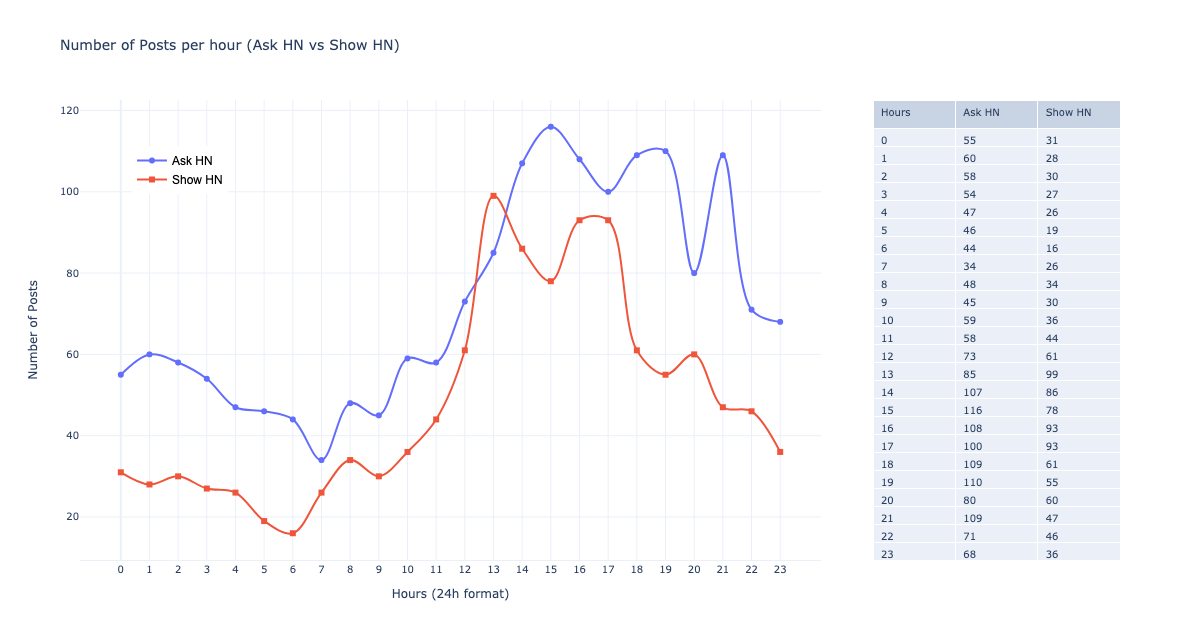

In [13]:
visualize_data(hourly_ask_posts, hourly_show_posts,
              'Hours (24h format)', 'Number of Posts',
               'Number of Posts per hour (Ask HN vs Show HN)')

### Observation

*Ask posts are most common at 15:00, 19:00, 21:00, 18:00 and 16:00 EST hours, while show posts are most common at 13:00, 16:00, 17:00 14:00 and 15:00 EST hours. Generally, every hour, there are more users asking questions on hacker news than those who are showing a specific content to the community. An exemption to this only occurs at 13:00 EST where we see the highest surge in the number of show HN posts.*

Next Let's visualize the total number of comments per hour created for both Ask HN and Show HN posts. Again we will refer to our handy `visualize_data()` function.

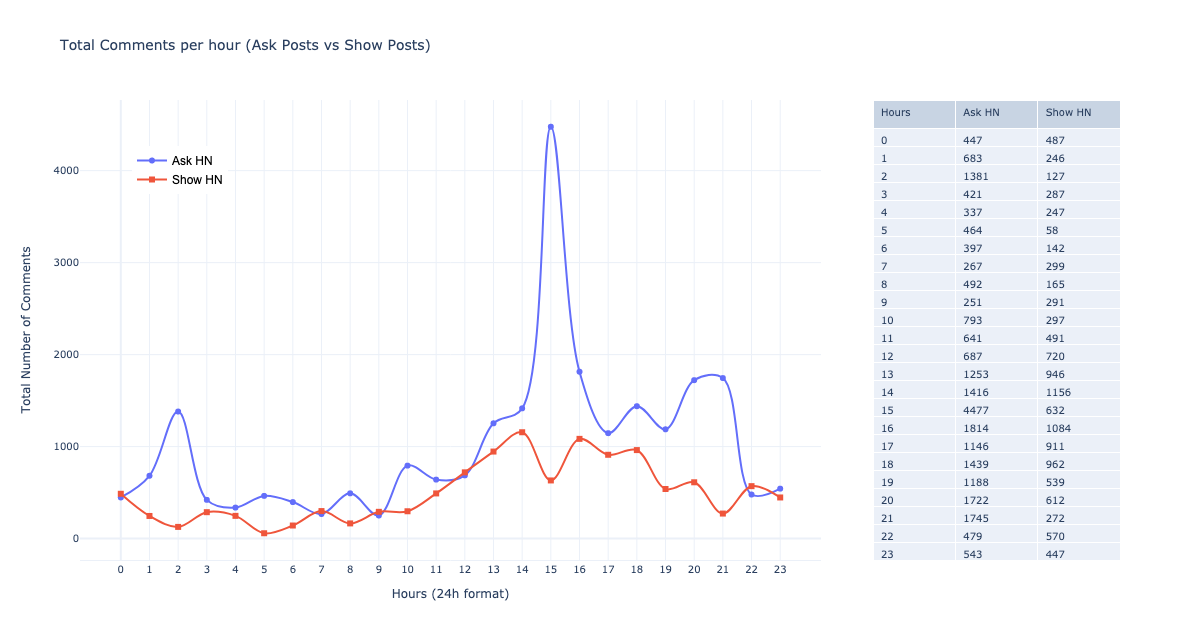

In [14]:
visualize_data(hourly_ask_comments, hourly_show_comments,
                   'Hours (24h format)', 'Total Number of Comments',
                  'Total Comments per hour (Ask Posts vs Show Posts)')

### Observation

*Again we'd observe that generally, Ask posts recieve more engagements in form of comments than Show posts. Based on the visualization above, it is easy to assume that people asking questions on Hacker news are more likely to get comments on their posts than people showing specific content. The hours with the highest number of comments for Ask posts are 15:00, 16:00, 21:00, 20:00 and 18:00 EST hours, while the hours that look promising for ensuring show post comments are 14:00, 16:00, 18:00, 13:00 and 17:00 EST.*

We will explore further and try to compute the average number of comments per hour for both Ask and Show posts.

## Average Comments per hour

We can define our average comment per hour for each post category as:
```
Average comments per hour = Total Number of Comments per hour / Number of posts per hour
```
Let's define a function called `compute_average()` to help us calculate the average number of comments for Ask HN and Show HN posts; from their corresponding dictionaries:

In [15]:
def compute_average(dict_a, dict_b):
    result = []
    
    for key in dict_a:
        average = dict_b[key]/dict_a[key]
        average = round(average) # round results to the nearest whole number
        result.append([key, average])
        
    return result

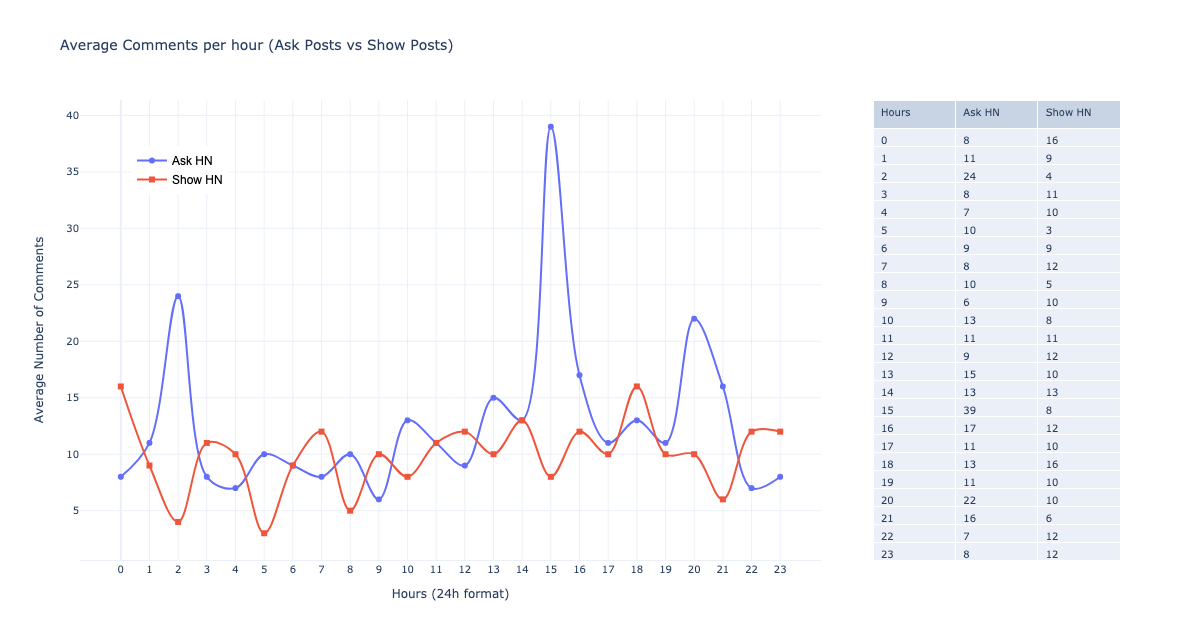

In [16]:
avg_ask_comments = compute_average(hourly_ask_posts, hourly_ask_comments)
avg_show_comments = compute_average(hourly_show_posts, hourly_show_comments)

visualize_data(dict(avg_ask_comments), dict(avg_show_comments),
              'Hours (24h format)', 'Average Number of Comments',
              'Average Comments per hour (Ask Posts vs Show Posts)')

### Observation

*While the difference may seem difficult to identify when comparing the averages. On closer observation, we'd notice that when Ask Posts record more comments (15:00, 20:00, 16:00 and 02:00 EST hours), they **significantly** outweigh those seen with show posts. However, when show posts record more comments, they are only marginally greater than those recorded at the same time for Ask Posts*

One may ask: At a glance, how can we get information about the top five hours to create posts in descending order, without using complex graphs or visualizations? We will define two functions that help us achieve this goal below:

## Sorting and Printing from Lists of Lists

A `sort_list()` function will take-in our lists containing average comments for both Show and Ask Posts, then return a resulting list sorted by average comments in descending order:

In [17]:
def sort_list(list_of_lists):
    
    temp_list = []
    result = []

    for row in list_of_lists:
        temp_list.append([row[1], row[0]])

    reversed_list = sorted(temp_list, reverse=True)
    
    for row in reversed_list:
        result.append([row[1], row[0]])
    
    return result

In [18]:
# sort the average_ask_comment and average_show_comment lists

ask_comments_sorted = sort_list(avg_ask_comments)
show_comments_sorted =sort_list(avg_show_comments)

Finally, a `print_best_hours()` function will print out the best hours to create Ask or Show posts from our sorted list of lists:

In [19]:
def print_best_hours(dataset, measure, post_name):
    
    print('Top 5 Hours to get {} for {}:'. format(measure,post_name))
    print('-'*45)

    counter = 0

    for row in dataset:
        if counter < 5:
            template = '{}: Average {} per post - {}'
            value = row[1]
            hours = row[0]
            hours = dt.time(hour=hours)
            template = template.format(hours,measure,value)
            print(template)
            counter +=1
        else:
            break

In [20]:
print_best_hours(ask_comments_sorted, 'comments', 'Ask HN posts')

print('\n')
print_best_hours(show_comments_sorted, 'comments', 'Show HN Posts')

Top 5 Hours to get comments for Ask HN posts:
---------------------------------------------
15:00:00: Average comments per post - 39
02:00:00: Average comments per post - 24
20:00:00: Average comments per post - 22
16:00:00: Average comments per post - 17
21:00:00: Average comments per post - 16


Top 5 Hours to get comments for Show HN Posts:
---------------------------------------------
18:00:00: Average comments per post - 16
00:00:00: Average comments per post - 16
14:00:00: Average comments per post - 13
23:00:00: Average comments per post - 12
22:00:00: Average comments per post - 12


### Observation

*It is particularly interesting to observe that the average number comments for Ask posts exceed those of Show posts across the top 5 hours displayed above. At 15:00 EST, ask posts get over 100% more comments, on average, than the highest averages obtained with show posts at any time of the day! This information buttresses some of the observations we made earlier.*

*For users looking to ensure the maximum engagement in form of comments, the best time to create Ask Posts is 15:00 EST. Users looking to share content with the community in form of Show posts could consider creating these posts at 18:00 or 00:00 EST.*

# Exploring Further

Now that we have established that `Ask HN` posts gather more comments on average than `Show HN` posts, we also want to determine if they get more points on average than show posts. It would also be interesting to learn if there is any relationship between the time a post is created and the tendency of that post to gather more points. 

## Average Number of Points for Each Category

We know the index of `num_points` for each post - `3`. Hence, we can use our calculate_average function to quickly analyse this information:

In [21]:
avg_points_show = calculate_average(show_posts, 3)
avg_points_ask = calculate_average(ask_posts, 3)

template = '{}: {} points on average'
print(template.format('Ask HN', avg_points_ask))
print(template.format('Show HN', avg_points_show))

Ask HN: 15.06 points on average
Show HN: 27.56 points on average


### Observation

*Things are look quite different when considering the number of points a post receives. It appears that Show posts gather a lot more points on average (27.56) than Ask posts (15.06).*

Next, we'll examine the total number of points generated per hour of post creation, then compare across both categories:

## Number of Points by Hour of Post Creation
To compute this information, we will revert to the `compute_time_stats()` function that we defined previously:

In [22]:
hourly_ask_posts, hourly_ask_points = compute_time_stats(ask_posts, 6,3)
hourly_ask_posts, hourly_show_points = compute_time_stats(show_posts, 6,3)

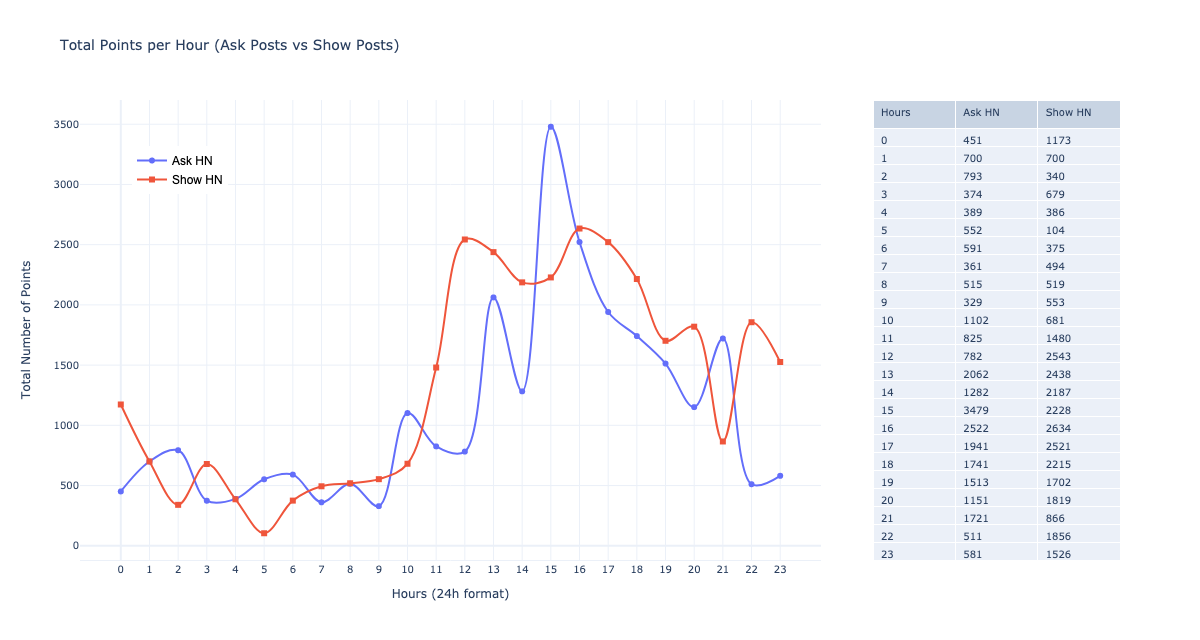

In [23]:
visualize_data(hourly_ask_points, hourly_show_points,
                   'Hours (24h format)', 'Total Number of Points',
                  'Total Points per Hour (Ask Posts vs Show Posts)')

### Observation

*We see that accross the different hours of the day, Show posts gather more points than Ask posts. However, at 15:00 EST (which is the peak hour for ask posts), ask posts gather far more points than show posts. This is not enough to offset the balance however, given that at many other hours of the day we see show posts gathering more points. The best hours in term of total points for Show posts are 16:00, 12:00, 17:00, 13:00 and 15:00 EST; while the best hours for ask posts are 15:00, 16:00, 13:00, 17:00, and 18:00 EST.*

## Average Points per Hour

Just as we defined our average comments per hour, we can define our average points per hour for each post category as:
```
Average points per hour = Total Number of points per hour / Number of posts per hour
```
Again, we will revert to the compute `compute_average()` function in order to calculate these averages. Then visualize the results with plotly.

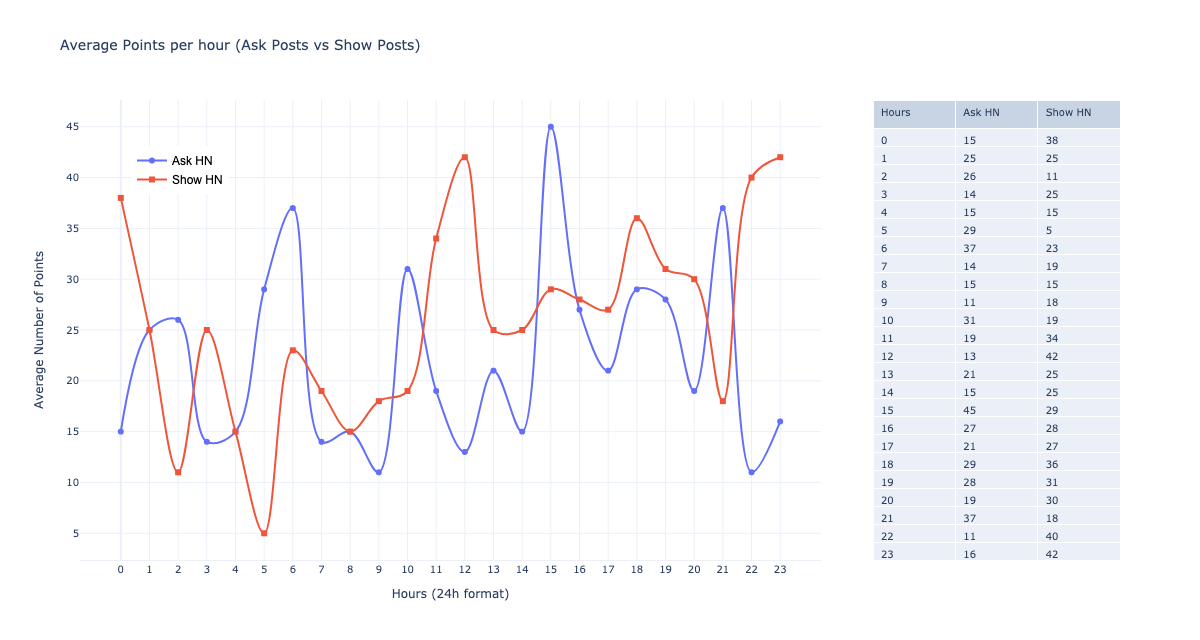

In [24]:
avg_ask_points = compute_average(hourly_ask_posts, hourly_ask_points)
avg_show_points = compute_average(hourly_show_posts, hourly_show_points)

visualize_data(dict(avg_ask_points), dict(avg_show_points),
              'Hours (24h format)', 'Average Number of Points',
              'Average Points per hour (Ask Posts vs Show Posts)')

### Observation

*Again We see that there are more occasions where Show Posts gather more points on average than Ask Posts. However, we see some hours where ask posts experience a surge in points over show posts; the most notable of these hours are 15:00 EST (the peak hour for ask posts), 06:00, 21:00, 10:00 and 02:00 EST*

Next, from each category, we will print out the top 5 hours by average points earned, **then we will try to identify how comments and points fluctuate with time - could they be correlated?**

## Best Hours to Create Posts That Gather Points

Again, we have previously defined a couple of handy functions to make this possible. We will use the `sort_list()` and `print_best_hour()` functions:

In [25]:
ask_points_sorted = sort_list(avg_ask_points)
show_points_sorted =sort_list(avg_show_points)

In [26]:
print_best_hours(ask_points_sorted, 'points', 'Ask HN posts')

print('\n')
print_best_hours(show_points_sorted, 'points', 'Show HN Posts')

Top 5 Hours to get points for Ask HN posts:
---------------------------------------------
15:00:00: Average points per post - 45
21:00:00: Average points per post - 37
06:00:00: Average points per post - 37
10:00:00: Average points per post - 31
18:00:00: Average points per post - 29


Top 5 Hours to get points for Show HN Posts:
---------------------------------------------
23:00:00: Average points per post - 42
12:00:00: Average points per post - 42
22:00:00: Average points per post - 40
00:00:00: Average points per post - 38
18:00:00: Average points per post - 36


### Observation

*For users who want to ask questions on Hacker news, the peak hour to get comments (15:00 EST) is also the best time to get the most points on their posts. This makes considerations much easier for them to make, knowing that they can get the best of both worlds.*

*However, users looking to create show posts may need to aproach this from a more informed perspective. The peak hour for comments (18:00 EST) is actually the fifth ranked in terms of average points. Users in this group may have to make decisions on what matters more; comments or points. 23:00 EST promises the best chances for points, while 18:00 EST gives the best chance for comments.*

Now lets try to answer another interesting question:

## Do Comments Correlate With Points?

Higher comments may mean more users are interacting with a post on Hacker News. It is easy to assume that the more the users that are commenting on a post, the more likely it is for that post to earn points. We will create a couple of visualisations to help us double-check our assumptions.

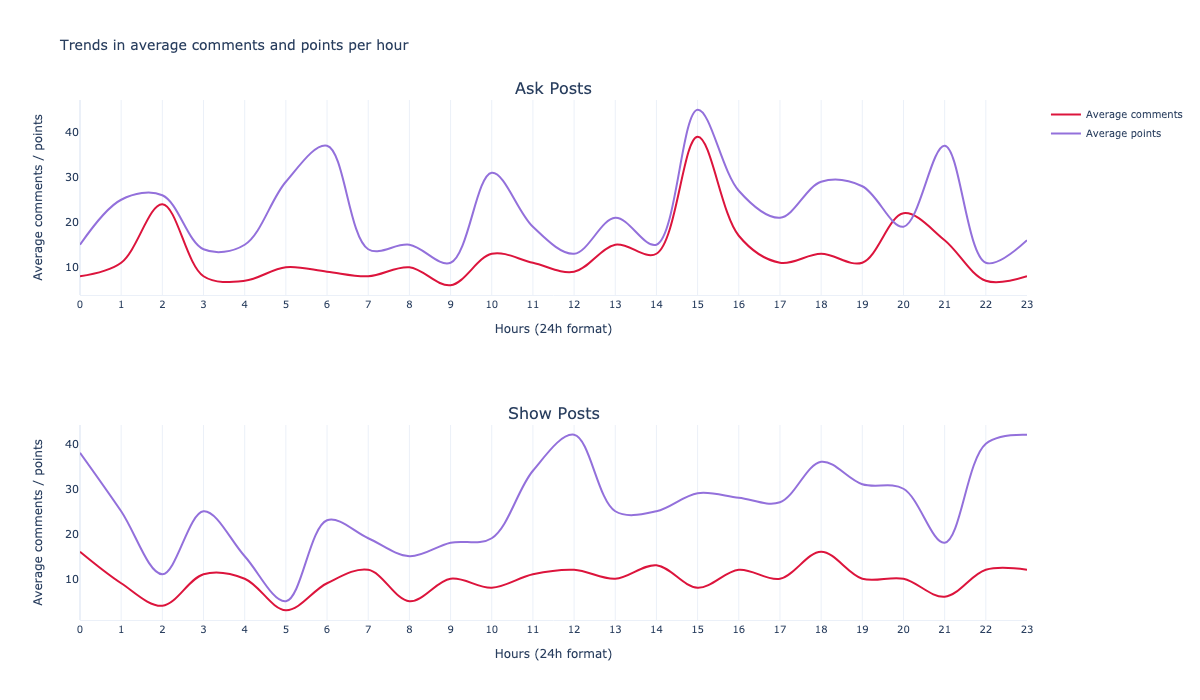

In [27]:
fig = make_subplots(rows= 2, cols=1, subplot_titles=('Ask Posts', 'Show Posts'),
                   shared_xaxes = False)

x1 = list(dict(avg_ask_comments).keys())
y1 = list(dict(avg_ask_comments).values())
y2 = list(dict(avg_ask_points).values())
ya = list(dict(avg_show_comments).values())
yb = list(dict(avg_show_points).values())


fig.add_trace(go.Scatter(x=x1, y=y1, mode = 'lines',
                         textposition="top center", text=y1,
                         line_shape = 'spline', name='Average comments',
                         textfont_size=10, line_color='crimson'), row=1, col=1)

fig.add_trace(go.Scatter(x=x1, y=y2, mode = 'lines',
                         textposition="top center", text=y1,
                         line_shape = 'spline', name='Average points',
                         textfont_size=10, line_color='MediumPurple', showlegend=False), row=1, col=1)

fig.add_trace(go.Scatter(x=x1, y=ya, mode = 'lines',
                         textposition="bottom center", text=y2,
                         line_shape = 'spline', name='Average comments',
                         textfont_size=10, line_color ='crimson', showlegend=False), row =2, col=1)

fig.add_trace(go.Scatter(x=x1, y=yb, mode = 'lines',
                         textposition="bottom center", text=y2,
                         line_shape = 'spline', name='Average points',
                         textfont_size=10, line_color='MediumPurple'), row =2, col=1)


fig.update_layout(template = 'plotly_white', title_text= 'Trends in average comments and points per hour',
                 height=700, font_size = 10)

fig.update_xaxes(tickmode='array', tickvals=x1, tickfont_size= 10, 
                 showline=True, title_text='Hours (24h format)')

fig.update_yaxes(showgrid=False, tickfont_size= 11, title_text='Average comments / points')


fig.show('png', width=1200)

### Observation

*For both Ask posts and Show posts, the number of points fluctuate, accross the hour, in the same direction as the number of comments. This implies that the more people interact and comment on a post, the more the chances of the post gathering more points on Hacker News.*

## Recommendations for Posting to Hacker News

From our analysis, it's clear that Ask HN posts receive the most comments per post (14.04 on average). Ask posts that were published at 15:00 hrs (3pm - EST) received the highest number of comments. Users looking to ask questions on the platform should create and publish posts at 15:00 for maximum engagement.

Users looking to share some content should consider creating and publishing their posts at 23:00 hrs (11pm - EST) to get the maximum chance for points. Since we know that points fluctuate in the same direction as the number of comments, they can rest assured that they'd get some comments as well. 

## Conclusion

In this project, we analyzed Hacker News data to determine which postings drive the most engagement. We focused majorly on the Ask HN and Show HN categories. Based on our analysis, we recommended that users create Ask posts around `15:00 EST`. However, show posts provides many more trade-offs to consider: users who want more points could post at `23:00 EST` and those who more comments could post at `18:00 EST`.

The behaviour observed with ask posts (higher comments) and show posts (higher points) may be due, in part, to the fact that ask posts are majorly questions. Questions beckon to others in the community to provide support, which would be generally provided in form of comments or responses. Show posts, on the other hand, would require some creativity to capture the hacker news crowd, and users who post something interesting will most likely be rewarded with upvotes which determines the total number of points in the long run.

# Prompts for Future Exploration

Since correlation does not neccessarily imply causation. Is there any tool we could consider to investigate if comments can *cause* posts to gather points or vice versa.